<a href="https://colab.research.google.com/github/dwialfian211/dashboard-powerbi/blob/main/Segmentasi_Pelanggan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Segmentasi Customer (Metode RFM)**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data analisa chemical industry.xlsx to data analisa chemical industry (1).xlsx


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# Baca file XLSX
df = pd.read_excel("data analisa chemical industry.xlsx")
df.head()

,Cust,Invoice No.,Invoice Date,Month,Item No.,Item Description,Amount,Quantity,Tax Amount,Total,Salesman Name,Dept. Name
0,CustID 20241,SI24007546,2024-09-03,September,1212600029,"ROCKWOOL PIPA 3/4"" 25MM",182889.0,7,20117.79,203006.79,SalesID 04,INSULATION
1,CustID 20241,SI24007546,2024-09-03,September,1212600016,"ROCKWOOL PIPA 1/2"" 25MM",352257.0,17,38748.27,391005.27,SalesID 04,INSULATION
2,CustID 20242,SI24001281,2024-02-12,Februari,1201500016,CERAMIC FIBER BLANKET D.96 25X610X7200MM,2594598.4,10,285405.82,2880004.22,SalesID 02,INSULATION
3,CustID 20243,SI24000950,2024-01-30,Januari,1212600028,"ROCKWOOL PIPA 3"" 25MM",445046.5,10,48955.11,494001.61,SalesID 05,INSULATION
4,CustID 20243,SI24001125,2024-02-05,Februari,1212600028,"ROCKWOOL PIPA 3"" 25MM",93694.0,2,10306.34,104000.34,SalesID 05,INSULATION


**Segmentasi Customer Menggunakan Metode RFM (Recency, Frequency, dan Monetary**

RFM adalah metode yang digunakan untuk mengelompokkan pelanggan berdasarkan kebiasaan perilaku pembelian mereka. Metode ini termasuk dalam kategori segmentasi behavioral, yaitu segmentasi yang berfokus pada apa yang dilakukan pelanggan, bukan siapa mereka.

**🕒 Recency (R)**

Recency mengukur berapa lama waktu yang telah berlalu sejak pelanggan terakhir kali melakukan pembelian. Semakin kecil nilai recency, semakin baru pelanggan melakukan transaksi. Jika pelanggan hanya membeli sekali, maka recency-nya adalah 0 hari (pembelian terakhir = pembelian pertama).

Contoh:
Jika hari ini adalah 30 Juli dan pelanggan terakhir bertransaksi pada 20 Juli → Recency = 10 hari.

**🔁 Frequency (F)**

Frequency mengukur seberapa sering pelanggan melakukan pembelian dalam periode waktu tertentu. Biasanya dihitung dari jumlah transaksi unik yang dilakukan pelanggan. Jika ingin menyesuaikan dengan pembelian ulang, bisa dihitung sebagai:Frequency = Jumlah total pembelian - 1

Catatan: Jika pelanggan baru membeli sekali, maka frekuensinya 0 kali pembelian ulang.

**💰 Mean Monetary Value (M)**

Monetary mengukur nilai uang yang telah dihabiskan oleh pelanggan dalam periode waktu tertentu yaitu total jumlah uang yang dibelanjakan pelanggan yang dihitung sebagai penjumlahan dari semua transaksi pelanggan tersebut

In [118]:
# Menghitung nilai RFM

# Snapshot date (tanggal)
snapshot_date = df['Invoice Date'].max() + pd.Timedelta(days=1)

# Mengitung RFM
rfm = df.groupby('Cust').agg({
    'Invoice Date': lambda x: (snapshot_date - x.max()).days,   # Recency
    'Invoice No.': 'nunique',                                     # Frequency
    'Total': 'sum'                                              # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,CustID 20241,119,1,594012.06
1,CustID 202410,29,7,25890750.00
2,CustID 202411,8,1,1256000.52
3,CustID 202412,152,5,20945789.91
4,CustID 202413,64,1,550003.89


Segmentasi Pelanggan Berdasarkan Recency

In [119]:
# Segmentasi Recency

# Kuartil Recency
quartiles = rfm['Recency'].quantile([0.25, 0.5, 0.75])
q1 = quartiles[0.25]
q2 = quartiles[0.5]
q3 = quartiles[0.75]

# Menampilkan batas kuartil
print(f"Q1 (25%) = {q1}")
print(f"Q2 (50%) = {q2}")
print(f"Q3 (75%) = {q3}")

Q1 (25%) = 49.0
Q2 (50%) = 110.0
Q3 (75%) = 243.5


In [120]:
# Mengelompokkan Recency
def segment_recency(recency):
    if recency <= q1:
        return 'Active'
    elif recency <= q2:
        return 'Slight Active'
    elif recency <= q3:
        return 'Slight Inactive'
    else:
        return 'Inactive'

rfm['Recency_Segment'] = rfm['Recency'].apply(segment_recency)
rfm[['CustomerID', 'Recency', 'Recency_Segment']].head()

,CustomerID,Recency,Recency_Segment
0,CustID 20241,119,Slight Inactive
1,CustID 202410,29,Active
2,CustID 202411,8,Active
3,CustID 202412,152,Slight Inactive
4,CustID 202413,64,Slight Active


- Segmen Active merupakan segmen customer yang masih sering berbelanja, oleh karena itu bisa diarahkan campaign untuk meningkatkan volume pembelian seperti cross-selling atau up-selling.
- Segmen Slight Active merupakan segmen customer yang sedikit sering berbelanja sehingga ada kemungkinan customer bisa churn, maka bisa diarahkan campaign untuk retention campaign atau bisa ditawarkan cross-selling.
- Segmen Slight Inactive merupakan segmen customer yang sudah mulai tidak berbelanja dan akan sangat besar resikonya untuk churn, sehingga bisa diarahkan campaign untuk menarik hati konsumen tersebut kembali dengan memberikan promosi atau campaign untuk re-activation.
- Segmen Inactive merupakan segmen customer yang sudah bisa disebut churn karena sudah sangat lama sebelum terakhi melakukan pembelian, maka untuk campaign yang dapat dilakukan adalah re-activation campaign.

In [121]:
# Distribusi Pelanggan per Segmen
# Menghitung jumlah dan persentase pelanggan per segmen Recency
segment_count = rfm['Recency_Segment'].value_counts()
segment_percent = rfm['Recency_Segment'].value_counts(normalize=True) * 100

segment_summary = pd.DataFrame({
    'Jumlah Customer': segment_count,
    'Persentase (%)': segment_percent.round(2)
})
print(segment_summary)

                 Jumlah Customer  Persentase (%)
Recency_Segment                                 
Active                        18           27.27
Inactive                      17           25.76
Slight Inactive               16           24.24
Slight Active                 15           22.73


Segmentasi Berdasarkan Frequency dan Monetary Menggunakan Clustering

Dua metrik frequency dan monetary memiliki jenis penilaian yang sama, yaitu customer yang bisa dianggap loyal adalah customer yang sering membeli dan pengeluaran setiap membeli produk cukup besar. Untuk dapat melakukan segmentasi customer yang bisa disebut high-value, medium-value, dan low-value, maka akan digunakan kedua metrik tersebut dengan cara melakukan clustering.

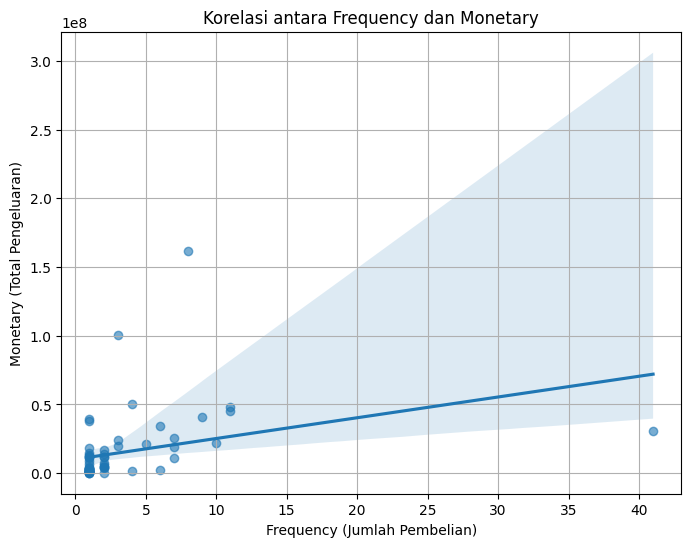

In [122]:
# Korelasi Frequency dan Monetary
plt.figure(figsize=(8,6))
sns.regplot(data=rfm, x='Frequency', y='Monetary', scatter_kws={'alpha':0.6})
plt.title('Korelasi antara Frequency dan Monetary')
plt.xlabel('Frequency (Jumlah Pembelian)')
plt.ylabel('Monetary (Total Pengeluaran)')
plt.grid(True)
plt.show()

Berdasarkan informasi pada plot tersebut diketahui bahwa kebanyakan customer yang sering melakukan transaksi, besaran transaksi yang dilakukan memiliki nilai yang cukup kecil. Berdasarkan informasi pada sebaran antara frequency dan monetary masing-masing customer diketahui bahwa terdapat banyak sekali beberapa nilai outlier. Artinya beberapa customer memiliki pengeluaran yang cukup besar sekali dan secara frekuensi berbelanja juga sangat sering sekali. Outlier pada data tersebut perlu dikeluarkan terlebih dahulu agar tidak mengganggu proses clustering.

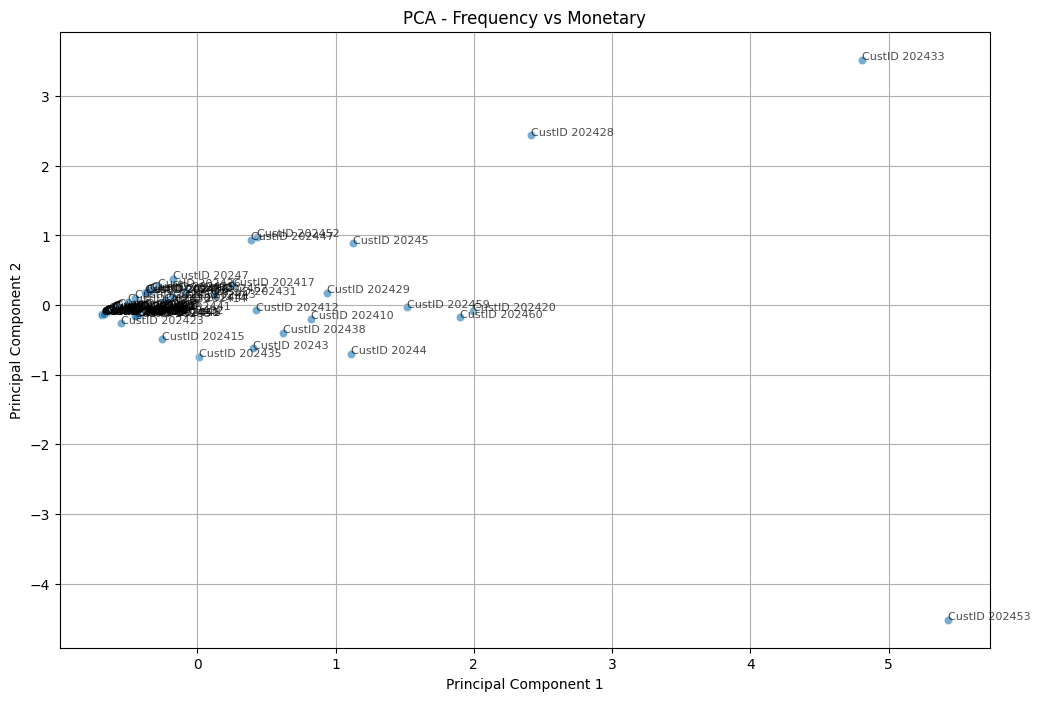

In [123]:
from sklearn.preprocessing import StandardScaler

# Mengambil subset untuk Frequency dan Monetary
fm_data = rfm[['Frequency', 'Monetary']]

# Standardisasi data
scaler = StandardScaler()
fm_scaled = scaler.fit_transform(fm_data)
from sklearn.decomposition import PCA

# Penerapan PCA
pca = PCA(n_components=2)  # Ambil 2 komponen utama
fm_pca = pca.fit_transform(fm_scaled)

# Memasukkan data ke DataFrame
import pandas as pd
pca_df = pd.DataFrame(fm_pca, columns=['PC1', 'PC2'])
pca_df['CustomerID'] = rfm['CustomerID'].values
import matplotlib.pyplot as plt
import seaborn as sns

# Menambahkan CustomerID ke dalam DataFrame PCA
pca_df['CustomerID'] = rfm['CustomerID'].values

# Membuat plot
plt.figure(figsize=(12,8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', alpha=0.6)

# Menambahkan label CustomerID
for i in range(pca_df.shape[0]):
    plt.text(pca_df['PC1'][i],
             pca_df['PC2'][i],
             str(pca_df['CustomerID'][i]),
             fontsize=8, alpha=0.7)

plt.title('PCA - Frequency vs Monetary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [124]:
# Menghitung IQR untuk PC1
Q1_pc1 = pca_df['PC1'].quantile(0.25)
Q3_pc1 = pca_df['PC1'].quantile(0.75)
IQR_pc1 = Q3_pc1 - Q1_pc1
lower_pc1 = Q1_pc1 - 1.5 * IQR_pc1
upper_pc1 = Q3_pc1 + 1.5 * IQR_pc1

# Menghitung IQR untuk PC2
Q1_pc2 = pca_df['PC2'].quantile(0.25)
Q3_pc2 = pca_df['PC2'].quantile(0.75)
IQR_pc2 = Q3_pc2 - Q1_pc2
lower_pc2 = Q1_pc2 - 1.5 * IQR_pc2
upper_pc2 = Q3_pc2 + 1.5 * IQR_pc2

# Menandai outlier
pca_df['Outlier_PC1'] = (pca_df['PC1'] < lower_pc1) | (pca_df['PC1'] > upper_pc1)
pca_df['Outlier_PC2'] = (pca_df['PC2'] < lower_pc2) | (pca_df['PC2'] > upper_pc2)
pca_df['Outlier'] = pca_df['Outlier_PC1'] | pca_df['Outlier_PC2']

# Mengambil baris outlier
outliers = pca_df[pca_df['Outlier']]

# Menampilkan outlier
print(outliers[['CustomerID', 'PC1', 'PC2']])

       CustomerID       PC1       PC2
6   CustID 202415 -0.257798 -0.492420
12  CustID 202420  1.992617 -0.079212
20  CustID 202428  2.411616  2.439453
22   CustID 20243  0.399811 -0.622185
26  CustID 202433  4.808712  3.524257
28  CustID 202435  0.015767 -0.743771
33   CustID 20244  1.112895 -0.696475
41  CustID 202447  0.386796  0.939549
44   CustID 20245  1.127249  0.892627
47  CustID 202452  0.431226  0.983979
48  CustID 202453  5.425654 -4.519919
54  CustID 202459  1.518512 -0.028400
56  CustID 202460  1.897718 -0.174111


In [125]:
#Drop data outlier

outlier_ids = [
    'CustID 202415', 'CustID 202420', 'CustID 202428', 'CustID 20243',
    'CustID 202433', 'CustID 202435', 'CustID 20244', 'CustID 202447',
    'CustID 20245', 'CustID 202452', 'CustID 202453', 'CustID 202459',
    'CustID 202460'
]

rfm_cleaned = rfm[~rfm['CustomerID'].isin(outlier_ids)].reset_index(drop=True)

# Menampilkan jumlah data setelah outlier dihapus
print(f"Jumlah data setelah menghapus outlier: {len(rfm_cleaned)}")

rfm_cleaned.head()

Jumlah data setelah menghapus outlier: 53


,CustomerID,Recency,Frequency,Monetary,Recency_Segment
0,CustID 20241,119,1,594012.06,Slight Inactive
1,CustID 202410,29,7,25890750.00,Active
2,CustID 202411,8,1,1256000.52,Active
3,CustID 202412,152,5,20945789.91,Slight Inactive
4,CustID 202413,64,1,550003.89,Slight Active


Selanjutnya dibuat clustering berdasarkan nilai frequency dan monetary. Metode clustering yang digunakan yaitu K-Means, dimana k-means akan mengelompokkan setiap data kedalam beberapa kelompok berdasarkan kedekatan jarak antar observasi. Semakin dekat jarak antar observasi dinilai semakin mirip karakteristiknya. Semakin jauh jarak antar observasi dinilai semakin berbeda karakteristiknya. K-means menggunakan perhitungan jarak euclidean distance yang mana secara formula mirip sekali dengan formula pytaghoras.

Pada kasus ini, karena setiap customer ingin dikelompokkan dalam 3 segmen, high, low, dan very low maka jumlah cluster yang akan dibentuk sebanyak 3.

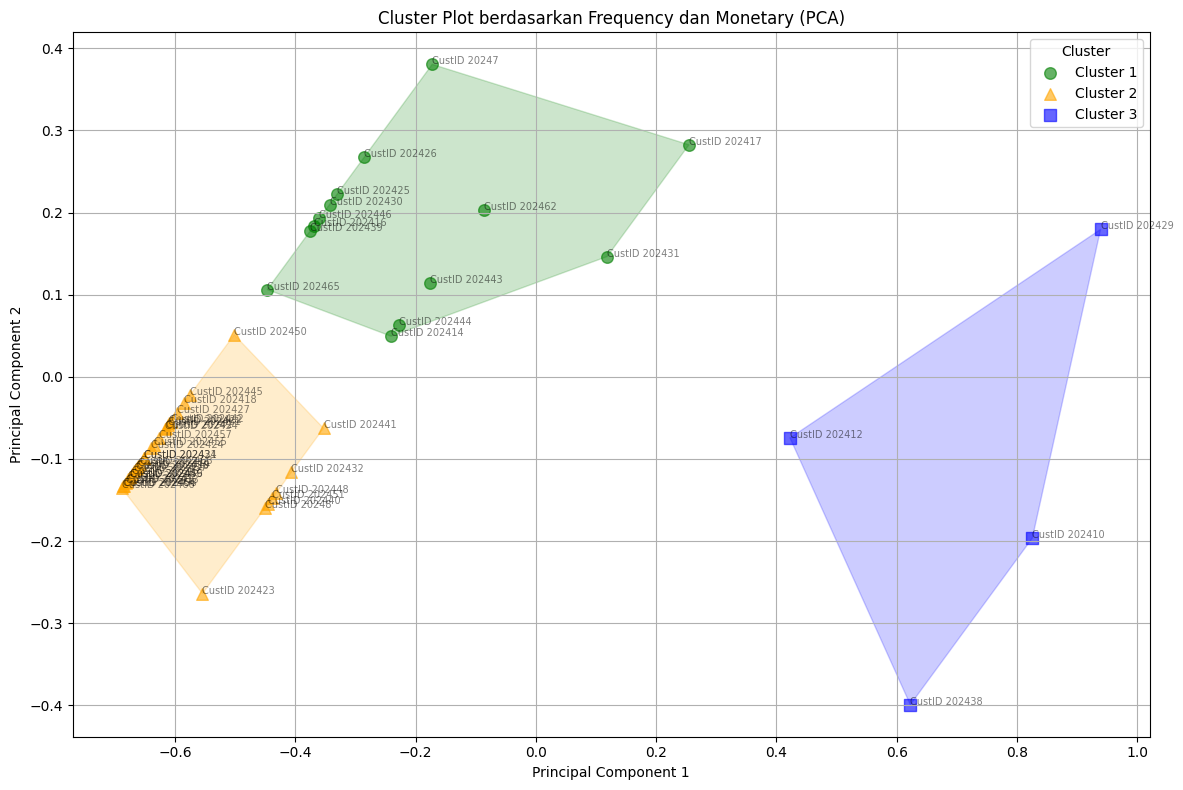

In [127]:
from scipy.spatial import ConvexHull

# Buat palet warna dan simbol berbeda per cluster
palette = {0: 'green', 1: 'orange', 2: 'blue'}
markers = {0: 'o', 1: '^', 2: 's'}  # bulat, segitiga, kotak

plt.figure(figsize=(12, 8))

for cluster_id in sorted(pca_df_cleaned['Cluster'].unique()):
    cluster_data = pca_df_cleaned[pca_df_cleaned['Cluster'] == cluster_id]

    # Plot titik dengan simbol berbeda
    plt.scatter(
        cluster_data['PC1'], cluster_data['PC2'],
        label=f'Cluster {cluster_id + 1}',
        c=palette[cluster_id],
        marker=markers[cluster_id],
        alpha=0.6,
        s=70
    )

    # Menambahkan nama customer
    for _, row in cluster_data.iterrows():
        plt.text(row['PC1'], row['PC2'], str(row['CustomerID']), fontsize=7, alpha=0.5)

    # Membuat convex hull
    if len(cluster_data) >= 3:
        points = cluster_data[['PC1', 'PC2']].values
        hull = ConvexHull(points)
        hull_pts = points[hull.vertices]
        plt.fill(hull_pts[:,0], hull_pts[:,1], alpha=0.2, color=palette[cluster_id])

plt.title('Cluster Plot berdasarkan Frequency dan Monetary (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [128]:
# Menambahkan label cluster hasil KMeans (0/1/2)
rfm_cleaned['Cluster'] = kmeans.labels_

# Mengambil data outlier berdasarkan CustomerID
outliers_df = rfm[rfm['CustomerID'].isin(outlier_ids)].copy()
outliers_df['Cluster'] = 'Cluster 4'

# Menggabungkan kembali rfm_cleaned + outlier
rfm_final = pd.concat([rfm_cleaned, outliers_df], ignore_index=True)

# Mengubah label cluster dari angka ke nama
rfm_final['Cluster'] = rfm_final['Cluster'].replace({
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3'
})

# Profiling karakteristik tiap cluster
profiling = rfm_final.groupby('Cluster')[['Frequency', 'Monetary']].agg(['mean', 'median', 'count']).round(2)
print(profiling)

          Frequency                  Monetary                   
               mean median count         mean       median count
Cluster                                                         
Cluster 1      1.57    1.0    14  14263594.29  12687176.68    14
Cluster 2      1.20    1.0    35   2459330.15   2016008.64    35
Cluster 3      6.25    6.5     4  25022299.88  23418269.96     4
Cluster 4      8.92    7.0    13  45545196.75  39727750.26    13


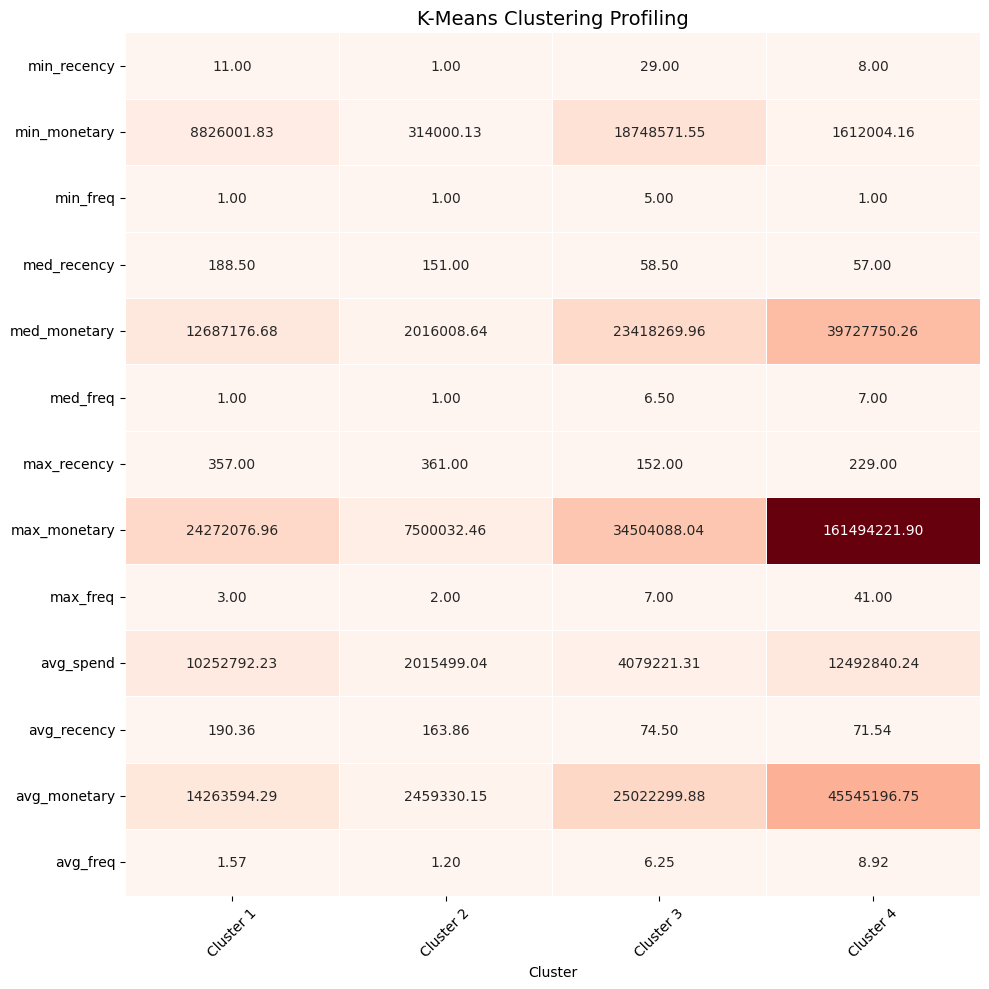

In [130]:
# Menambahkan metrik tambahan untuk heatmap
profiling_extended = rfm_final.groupby('Cluster').agg(
    min_recency = ('Recency', 'min'),
    min_monetary = ('Monetary', 'min'),
    min_freq = ('Frequency', 'min'),
    med_recency = ('Recency', 'median'),
    med_monetary = ('Monetary', 'median'),
    med_freq = ('Frequency', 'median'),
    max_recency = ('Recency', 'max'),
    max_monetary = ('Monetary', 'max'),
    max_freq = ('Frequency', 'max'),
    avg_spend = ('Monetary', lambda x: (x / rfm_final.loc[x.index, 'Frequency']).mean()),
    avg_recency = ('Recency', 'mean'),
    avg_monetary = ('Monetary', 'mean'),
    avg_freq = ('Frequency', 'mean'),
).round(2)

# Transpose: baris = metrik, kolom = cluster
profiling_heatmap = profiling_extended.T

# Membuat heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(profiling_heatmap, annot=True, fmt=".2f", cmap="Reds", linewidths=0.5, cbar=False)

plt.title("K-Means Clustering Profiling", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Cluster 1:very high recency, low frequency-monetary -> Medium value

Cluster 2:high recency, very low frequency-monetary -> Low value

Cluster 3:low recency, high frequency-monetary -> High value

Cluster 4:very low recency, very high frequency-monetary -> Special value

In [131]:
import plotly.express as px

# 7. Buat kolom label customer value
rfm_final['Customer_Value'] = rfm_final['Cluster'].map({
    'Cluster 4': 'Special Value',
    'Cluster 3': 'High Value',
    'Cluster 1': 'Medium Value',
    'Cluster 2': 'Low Value'
})

# 8. Buat plot interaktif
fig = px.scatter(
    rfm_final,
    x='Frequency',
    y='Monetary',
    color='Customer_Value',
    title='Customer Value Segmentation',
    hover_data={
        'CustomerID': True,
        'Customer_Value': True,
        'Frequency': True,
        'Monetary': ':.2f'
    },
    color_discrete_map={
        'Special Value': '#D68F91',
        'High Value': '#B63639',
        'Medium Value': '#ae2024',
        'Low Value': '#561011'
    },
    opacity=0.7
)

fig.update_traces(marker=dict(size=10))
fig.update_layout(xaxis_title='Frequency', yaxis_title='Monetary')
fig.show()


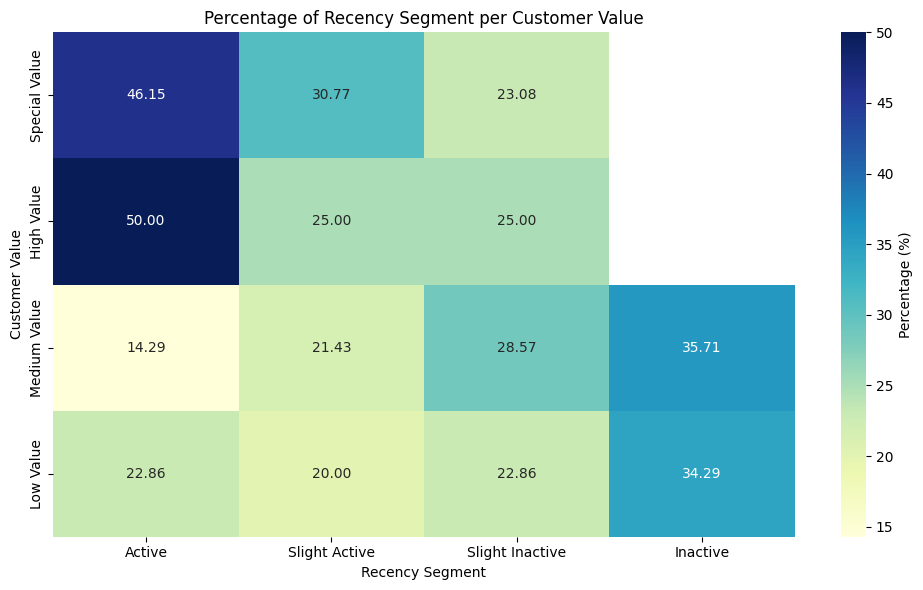

In [132]:
# Hitung jumlah customer untuk setiap kombinasi Customer_Value dan Recency_Segment
heatmap_data = (
    rfm_final.groupby(['Customer_Value', 'Recency_Segment'])['CustomerID']
    .count()
    .reset_index(name='Customer_Count')
)

# Hitung total per Customer_Value
total_per_value = heatmap_data.groupby('Customer_Value')['Customer_Count'].transform('sum')

# Hitung persentase
heatmap_data['Percentage'] = (heatmap_data['Customer_Count'] / total_per_value * 100).round(2)

# Ubah menjadi pivot (Y = Customer_Value, X = Recency_Segment)
heatmap_pivot = heatmap_data.pivot(index='Customer_Value', columns='Recency_Segment', values='Percentage')

# Urutkan kategori secara logis jika perlu
heatmap_pivot = heatmap_pivot.reindex(index=['Special Value', 'High Value', 'Medium Value', 'Low Value'],
                                      columns=['Active', 'Slight Active', 'Slight Inactive', 'Inactive'])


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_pivot,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    cbar_kws={'label': 'Percentage (%)'}
)

plt.title('Percentage of Recency Segment per Customer Value')
plt.xlabel('Recency Segment')
plt.ylabel('Customer Value')
plt.tight_layout()
plt.show()


In [133]:
# Salin dataframe awal agar tidak mengganggu aslinya
rfm_export = rfm.copy()

# Tambahkan kolom Recency_Segment jika belum
quartiles = rfm_export['Recency'].quantile([0.25, 0.5, 0.75])
q1 = quartiles[0.25]
q2 = quartiles[0.5]
q3 = quartiles[0.75]

def segment_recency(recency):
    if recency <= q1:
        return 'Active'
    elif recency <= q2:
        return 'Slight Active'
    elif recency <= q3:
        return 'Slight Inactive'
    else:
        return 'Inactive'

rfm_export['Recency_Segment'] = rfm_export['Recency'].apply(segment_recency)

# Buat kolom Customer_Value sesuai cluster
# Pastikan Anda sudah punya rfm_final yang berisi cluster info
value_map = {
    'Cluster 1': 'Medium Value',
    'Cluster 2': 'Low Value',
    'Cluster 3': 'High Value',
    'Cluster 4': 'Special Value'
}
rfm_export = rfm_export.merge(rfm_final[['CustomerID', 'Cluster']], on='CustomerID', how='left')
rfm_export['Customer_Value'] = rfm_export['Cluster'].map(value_map)

# Simpan ke file CSV
rfm_export.to_csv("customer_rfm_segmented.csv", index=False)

print("File berhasil disimpan sebagai 'customer_rfm_segmented.csv'")
rfm_export.head()

File berhasil disimpan sebagai 'customer_rfm_segmented.csv'


,CustomerID,Recency,Frequency,Monetary,Recency_Segment,Cluster,Customer_Value
0,CustID 20241,119,1,594012.06,Slight Inactive,Cluster 2,Low Value
1,CustID 202410,29,7,25890750.00,Active,Cluster 3,High Value
2,CustID 202411,8,1,1256000.52,Active,Cluster 2,Low Value
3,CustID 202412,152,5,20945789.91,Slight Inactive,Cluster 3,High Value
4,CustID 202413,64,1,550003.89,Slight Active,Cluster 2,Low Value
